In [182]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from IPython.display import clear_output

In [ ]:
#!zip -r test.zip ./text_files

In [ ]:
import os
all_files = []

for dirname, _, filenames in os.walk('../input/initial-txt'):
    for filename in filenames:
        if filename.endswith('.txt'):
            all_files.append(os.path.join(dirname, filename))

In [ ]:
len(all_files)

In [ ]:
clean_files_with_dir = []
clean_file_only_names = []
edf_files = []
for file_name in all_files:
    file_name = file_name.split('/')[4:]
    clean_file_only_names.append(file_name[-1])
    file_name1 = '/'.join(file_name)
    file_name = "https://isip.piconepress.com/projects/tuh_eeg/downloads/tuh_eeg_abnormal/v2.0.0/" + file_name1
    file_name_edf = "https://isip.piconepress.com/projects/tuh_eeg/downloads/tuh_eeg_abnormal/v2.0.0/" + file_name1[:-4]+'_t000.edf'
    edf_files.append(file_name_edf)
    clean_files_with_dir.append(file_name)

In [ ]:
!mkdir ./text_files
!mkdir ./edf/
!mkdir ./edf/none
#!mkdir ./edf/keppra/
#!mkdir ./edf/dilantin/
!mkdir ./edf/med/

In [ ]:
from tqdm import tqdm
def check_file(file):
    f = open(file, "r")
    try:
        medication_lines = f.readlines()
        for line in medication_lines:
            found_age = []
            line = line.lower()
            if line.startswith("medication"):
                if ',' in line or 'and' in line:
                    return 1
                elif 'keppra' in line:
                    return 1
                elif 'dilantin' in line:
                    return 1
                if 'none' in line:
                    return 0
                elif 'unknown' in line:
                    return 404
                else:
                    return 404
    except:
        return 404

In [ ]:
"""for file_dir in tqdm(clean_files_with_dir):
    !wget -q --user nedc --password nedc_resources  $file_dir -P ./text_files/"""
all_files = []
for dirname, _, filenames in os.walk('../input/report-files/text_files/'):
    for filename in filenames:
        if filename.endswith('.txt'):
            all_files.append(os.path.join(dirname, filename))

In [ ]:
"""
all_files = []
idxx = 0

for dirname, _, filenames in os.walk('./text_files/'):
    for filename in filenames:
        if filename.endswith('.txt'):
            all_files.append(os.path.join(dirname, filename))
            
no_medications_files = []
medications_files = []

from random import shuffle

shuffle(all_files)

for file in all_files:
    out = check_file(file)
    if out == 0:
        if len(no_medications_files)<100:
            no_medications_files.append(file)
    elif out == 1:
        if len(medications_files)<100:
            medications_files.append(file)
len(no_medications_files), len(medications_files)"""

In [ ]:
text_files = []
for edf in edf_files:
    edf = '../input/report-files/text_files/'+edf.split('/')[-1][:-9]+'.txt'
    text_files.append(edf)
edf_files[:3], text_files[:3], all_files[:3]

In [271]:
edf_files[-3:]

['https://isip.piconepress.com/projects/tuh_eeg/downloads/tuh_eeg_abnormal/v2.0.0/edf/train/abnormal/01_tcp_ar/085/00008576/s001_2012_01_22/00008576_s001_t000.edf',
 'https://isip.piconepress.com/projects/tuh_eeg/downloads/tuh_eeg_abnormal/v2.0.0/edf/train/abnormal/01_tcp_ar/085/00008579/s002_2012_01_19/00008579_s002_t000.edf',
 'https://isip.piconepress.com/projects/tuh_eeg/downloads/tuh_eeg_abnormal/v2.0.0/edf/train/abnormal/01_tcp_ar/085/00008579/s001_2012_01_16/00008579_s001_t000.edf']

In [ ]:
for edf_file, file_dir in zip(tqdm(edf_files[2500:]), text_files[2500:]):
    out = check_file(file_dir)
    if out == 0:
        !wget -q --user nedc --password nedc_resources  $edf_file -P ./edf/none/
    elif out == 1:
        !wget -q --user nedc --password nedc_resources  $edf_file -P./edf/med/
    #elif out == 2:
    #    !wget -q --user nedc --password nedc_resources  $edf_file -P./edf/none/

In [272]:
"""145
64
100
2993"""

!ls -1 ./edf/none/ | wc -l 
!ls -1 ./edf/med/ | wc -l
#!ls -1 ./edf/keppra/ | wc -l
!ls -1 ../input/report-files/text_files | wc -l

150
275
2876


In [ ]:
"""import os
train_normal_file_names = []
train_abnormal_file_names = []
test_abnormal_file_names = []
test_normal_file_names = []

for dirname, _, filenames in os.walk('./isip.piconepress.com/projects/tuh_eeg/downloads/tuh_eeg_abnormal/v2.0.0/edf/train/normal'):
    for filename in filenames:
        train_normal_file_names.append(os.path.join(dirname, filename))
for dirname, _, filenames in os.walk('./isip.piconepress.com/projects/tuh_eeg/downloads/tuh_eeg_abnormal/v2.0.0/edf/train/abnormal'):
    for filename in filenames:
        train_abnormal_file_names.append(os.path.join(dirname, filename))
for dirname, _, filenames in os.walk('./isip.piconepress.com/projects/tuh_eeg/downloads/tuh_eeg_abnormal/v2.0.0/edf/eval/normal'):
    for filename in filenames:
        test_normal_file_names.append(os.path.join(dirname, filename))
for dirname, _, filenames in os.walk('./isip.piconepress.com/projects/tuh_eeg/downloads/tuh_eeg_abnormal/v2.0.0/edf/eval/abnormal'):
    for filename in filenames:
        test_abnormal_file_names.append(os.path.join(dirname, filename))

txt_files = [train_normal_file_names, train_abnormal_file_names, test_normal_file_names, test_abnormal_file_names]"""

In [ ]:
"""keppra_files = []
dilatin_files = []
none_files = []
i = 0
for txt_file_list in txt_files:
    for file in txt_file_list:
        f = open(file, "r")
        try:
            medication_lines = f.readlines()
            for line in medication_lines:
                line = line.lower()
                if line.startswith("medication"):
                    if 'dilantin' in line and 'keppra' in line:
                        pass
                    elif 'keppra' in line:
                        keppra_files.append(file)
                    elif 'dilantin' in line:
                        dilatin_files.append(file)
                    elif 'none' in line:
                        none_files.append(file)
        except:
            pass
        
len(keppra_files), len(none_files), len(dilatin_files)"""

In [ ]:
"""!mkdir ./Data
!mkdir ./Data/keppra/
!mkdir ./Data/dilantin/
!mkdir ./Data/none/"""
"""
keppra_files_updated = []
dilantin_files_updated = [] 
none_files_updated = []
for file_name in keppra_files:
    file_name = file_name[:-4]+'_t000.edf'
    keppra_files_updated.append(file_name)
for file_name in dilatin_files:
    file_name = file_name[:-4]+'_t000.edf'
    dilantin_files_updated.append(file_name)
for file_name in none_files:
    file_name = file_name[:-4]+'_t000.edf'
    none_files_updated.append(file_name)"""

In [ ]:
"""%%capture
from tqdm import tqdm

for file_path in none_files:
    file_path = "https://"+'/'.join(file_path.split("/")[1:-1])
    !wget --user nedc --password nedc_resources -r -np -R "index.html*" --accept "*.edf" $file_path ./Data/none/
for file_path in dilatin_files:
    file_path = "https://"+'/'.join(file_path.split("/")[1:-1])
    !wget --user nedc --password nedc_resources -r -np -R "index.html*" --accept "*.edf" $file_path ./Data/dilatin/
for file_path in keppra_files:
    file_path = "https://"+'/'.join(file_path.split("/")[1:-1])
    !wget --user nedc --password nedc_resources -r -np -R "index.html*" --accept "*.edf" $file_path ./Data/keppra/"""

In [184]:
%%capture
!pip install mne
!pip install git+https://github.com/TNTLFreiburg/braindecode.git

In [ ]:
"""all_files = []

for dirname, _, filenames in os.walk('./isip.piconepress.com/projects/tuh_eeg/downloads/tuh_eeg_abnormal/v2.0.0/edf'):
    for filename in filenames:
        all_files.append(os.path.join(dirname, filename))

for file_path in tqdm(all_files):
    if file_path in keppra_files_updated:
        !mv $file_path ./Data/keppra/
    if file_path in dilantin_files_updated:
        !mv $file_path ./Data/dilantin/
    if file_path in none_files_updated:
        !mv $file_path ./Data/none/"""

In [185]:
import numpy as np
from sklearn.metrics import roc_auc_score
import numpy as np
from numpy.random import RandomState
from braindecode.datautil.iterators import _compute_start_stop_block_inds

class CroppedDiagnosisMonitor(object):
    """
    Compute trialwise misclasses from predictions for crops for non-dense predictions.
    Parameters
    ----------
    input_time_length: int
        Temporal length of one input to the model.
    """

    def __init__(self, input_time_length, n_preds_per_input):
        self.input_time_length = input_time_length
        self.n_preds_per_input = n_preds_per_input

    def monitor_epoch(self, ):
        return

    def monitor_set(self, setname, all_preds, all_losses,
                    all_batch_sizes, all_targets, dataset):
        """Assuming one hot encoding for now"""
        preds_per_trial = compute_preds_per_trial(
            all_preds, dataset, input_time_length=self.input_time_length,
            n_stride=self.n_preds_per_input)

        mean_preds_per_trial = [np.mean(preds, axis=(0, 2)) for preds in
                                preds_per_trial]
        mean_preds_per_trial = np.array(mean_preds_per_trial)

        pred_labels_per_trial = np.argmax(mean_preds_per_trial, axis=1)
        assert pred_labels_per_trial.shape == dataset.y.shape
        accuracy = np.mean(pred_labels_per_trial == dataset.y)
        misclass = 1 - accuracy
        column_name = "{:s}_misclass".format(setname)
        out = {column_name: float(misclass)}
        y = dataset.y

        n_true_positive = np.sum((y == 1) & (pred_labels_per_trial == 1))
        n_positive = np.sum(y == 1)
        if n_positive > 0:
            sensitivity = n_true_positive / float(n_positive)
        else:
            sensitivity = np.nan
        column_name = "{:s}_sensitivity".format(setname)
        out.update({column_name: float(sensitivity)})

        n_true_negative = np.sum((y == 0) & (pred_labels_per_trial == 0))
        n_negative = np.sum(y == 0)
        if n_negative > 0:
            specificity = n_true_negative / float(n_negative)
        else:
            specificity = np.nan
        column_name = "{:s}_specificity".format(setname)
        out.update({column_name: float(specificity)})
        if (n_negative > 0) and (n_positive > 0):
            auc = roc_auc_score(y, mean_preds_per_trial[:,1])
        else:
            auc = np.nan
        column_name = "{:s}_auc".format(setname)
        out.update({column_name: float(auc)})
        return out

def compute_preds_per_trial(preds_per_batch, dataset, input_time_length,
                            n_stride):
    n_trials = len(dataset.X)
    i_pred_starts = [input_time_length -
                     n_stride] * n_trials
    i_pred_stops = [t.shape[1] for t in dataset.X]

    start_stop_block_inds_per_trial = _compute_start_stop_block_inds(
        i_pred_starts,
        i_pred_stops, input_time_length, n_stride,
        False)

    n_rows_per_trial = [len(block_inds) for block_inds in
                        start_stop_block_inds_per_trial]

    all_preds_arr = np.concatenate(preds_per_batch, axis=0)
    i_row = 0
    preds_per_trial = []
    for n_rows in n_rows_per_trial:
        preds_per_trial.append(all_preds_arr[i_row:i_row + n_rows])
        i_row += n_rows
    assert i_row == len(all_preds_arr)
    return preds_per_trial


class CroppedNonDenseTrialMisclassMonitor(object):
    """
    Compute trialwise misclasses from predictions for crops for non-dense predictions.
    Parameters
    ----------
    input_time_length: int
        Temporal length of one input to the model.
    """

    def __init__(self, input_time_length, n_preds_per_input):
        self.input_time_length = input_time_length
        self.n_preds_per_input = n_preds_per_input

    def monitor_epoch(self, ):
        return

    def monitor_set(self, setname, all_preds, all_losses,
                    all_batch_sizes, all_targets, dataset):
        """Assuming one hot encoding for now"""
        n_trials = len(dataset.X)
        i_pred_starts = [self.input_time_length -
                         self.n_preds_per_input] * n_trials
        i_pred_stops = [t.shape[1] for t in dataset.X]

        start_stop_block_inds_per_trial = _compute_start_stop_block_inds(
            i_pred_starts,
            i_pred_stops, self.input_time_length, self.n_preds_per_input,
            False)

        n_rows_per_trial = [len(block_inds) for block_inds in
                            start_stop_block_inds_per_trial]

        all_preds_arr = np.concatenate(all_preds, axis=0)
        i_row = 0
        preds_per_trial = []
        for n_rows in n_rows_per_trial:
            preds_per_trial.append(all_preds_arr[i_row:i_row + n_rows])
            i_row += n_rows

        mean_preds_per_trial = [np.mean(preds, axis=(0, 2)) for preds in
                                preds_per_trial]
        mean_preds_per_trial = np.array(mean_preds_per_trial)

        pred_labels_per_trial = np.argmax(mean_preds_per_trial, axis=1)
        assert pred_labels_per_trial.shape == dataset.y.shape
        accuracy = np.mean(pred_labels_per_trial == dataset.y)
        misclass = 1 - accuracy
        column_name = "{:s}_misclass".format(setname)
        return {column_name: float(misclass)}

In [258]:
# There should always be a 'train' and 'eval' folder directly
# below these given folders
# Folders should contain all normal and abnormal data files without duplications
class Config():
    data_folders = ['./edf/none/','./edf/med/']
    n_recordings = 500  # number of edf files to analyse, if you want to restrict the set size
    sensor_types = ["EEG"]
    n_chans = 21
    max_recording_mins = 35  # exclude larger recordings from training set
    sec_to_cut = 60  # cut away at start of each recording
    duration_recording_mins = 1#20  # how many minutes to use per recording
    test_recording_mins = 1#20
    max_abs_val = 800  # for clipping
    sampling_freq = 100
    divisor = 10  # divide signal by this
    test_on_eval = True  # teston evaluation set or on training set
    # in case of test on eval, n_folds and i_testfold determine
    # validation fold in training set for training until first stop
    n_folds = 3
    i_test_fold = 9
    shuffle = True
    model_name = 'deep'
    n_start_chans = 25
    n_chan_factor = 2  # relevant for deep model only
    input_time_length = 6000
    final_conv_length = 'auto'
    model_constraint = 'defaultnorm'
    init_lr = 1e-3
    batch_size = 16
    max_epochs = 5 # until first stop, the continue train on train+valid
    cuda = False
    n_classes = 2

In [187]:
import re
import numpy as np
import glob
import os.path
import mne

def session_key(file_name):
    """ sort the file name by session """
    return re.findall(r'(s\d{2})', file_name)


def natural_key(file_name):
    """ provides a human-like sorting key of a string """
    key = [int(token) if token.isdigit() else None
           for token in re.split(r'(\d+)', file_name)]
    return key

def time_key(file_name):
    """ provides a time-based sorting key """
    splits = file_name.split('/')
    print(re.findall(r'(\d{4}_\d{2}_\d{2})', splits[-2]))
    [date] = re.findall(r'(\d{4}_\d{2}_\d{2})', splits[-2])
    date_id = [int(token) for token in date.split('_')]
    recording_id = natural_key(splits[-1])
    session_id = session_key(splits[-2])

    return date_id + session_id + recording_id


def read_all_file_names(path, extension, key="time"):
    """ read all files with specified extension from given path
    :param path: parent directory holding the files directly or in subdirectories
    :param extension: the type of the file, e.g. '.txt' or '.edf'
    :param key: the sorting of the files. natural e.g. 1, 2, 12, 21 (machine 1, 12, 2, 21) or by time since this is
    important for cv. time is specified in the edf file names
    """
    file_paths = glob.glob(path + '**/*' + extension, recursive=True)

    if key == 'time':
        return sorted(file_paths, key=time_key)

    elif key == 'natural':
        return sorted(file_paths, key=natural_key)

def get_info_with_mne(file_path):
    """ read info from the edf file without loading the data. loading data is done in multiprocessing since it takes
    some time. getting info is done before because some files had corrupted headers or weird sampling frequencies
    that caused the multiprocessing workers to crash. therefore get and check e.g. sampling frequency and duration
    beforehand
    :param file_path: path of the recording file
    :return: file name, sampling frequency, number of samples, number of signals, signal names, duration of the rec
    """
    try:
        edf_file = mne.io.read_raw_edf(file_path, verbose='error')
    except ValueError:
        return None, None, None, None, None, None
        
    # some recordings have a very weird sampling frequency. check twice before skipping the file
    sampling_frequency = int(edf_file.info['sfreq'])
    if sampling_frequency < 10:
        sampling_frequency = 1 / (edf_file.times[1] - edf_file.times[0])
        if sampling_frequency < 10:
            return None, sampling_frequency, None, None, None, None

    n_samples = edf_file.n_times
    signal_names = edf_file.ch_names
    n_signals = len(signal_names)
    # some weird sampling frequencies are at 1 hz or below, which results in division by zero
    duration = n_samples / max(sampling_frequency, 1)

    # TODO: return rec object?
    return edf_file, sampling_frequency, n_samples, n_signals, signal_names, duration


def get_recording_length(file_path):
    """ some recordings were that huge that simply opening them with mne caused the program to crash. therefore, open
    the edf as bytes and only read the header. parse the duration from there and check if the file can safely be opened
    :param file_path: path of the directory
    :return: the duration of the recording
    """
    f = open(file_path, 'rb')
    header = f.read(256)
    f.close()

    return int(header[236:244].decode('ascii'))


def load_data(fname, preproc_functions, sensor_types=['EEG']):
    cnt, sfreq, n_samples, n_channels, chan_names, n_sec = get_info_with_mne(fname)
    cnt.load_data()
    selected_ch_names = []
    
    wanted_elecs = ['A1', 'A2', 'C3', 'C4', 'CZ', 'F3', 'F4', 'F7', 'F8', 'FP1',
                    'FP2', 'FZ', 'O1', 'O2',
                    'P3', 'P4', 'PZ', 'T3', 'T4', 'T5', 'T6']

    for wanted_part in wanted_elecs:
        wanted_found_name = []
        for ch_name in cnt.ch_names:
            if ' ' + wanted_part + '-' in ch_name:
                wanted_found_name.append(ch_name)
        selected_ch_names.append(wanted_found_name[0])


    cnt = cnt.pick_channels(selected_ch_names)
    n_sensors = 0
    if 'EEG' in sensor_types:
        n_sensors += 21
    if 'EKG' in sensor_types:
        n_sensors += 1

    # change from volt to mikrovolt
    data = (cnt.get_data() * 1e6).astype(np.float32)
    fs = cnt.info['sfreq']
    for fn in preproc_functions:
        data, fs = fn(data, fs)
        data = data.astype(np.float32)
        fs = float(fs)
    return data


def get_all_sorted_file_names_and_labels(train_or_eval, folders):
    all_file_names = []
    for dirname, _, filenames in os.walk(folders[0]):
        for filename in filenames:
            all_file_names.append(os.path.join(dirname, filename))
    for dirname, _, filenames in os.walk(folders[1]):
        for filename in filenames:
            all_file_names.append(os.path.join(dirname, filename))  
    #for dirname, _, filenames in os.walk(folders[2]):
    #    for filename in filenames:
    #        all_file_names.append(os.path.join(dirname, filename))
            
    labels = []
    for file in all_file_names:
        if '/none/' in file:
            labels.append(0)
       # elif '/dilantin/' in file:
       #     labels.append(1)
        elif '/med/' in file:
            labels.append(1)
    labels = np.array(labels).astype(np.int64)
    return all_file_names, labels


class DiagnosisSet(object):
    def __init__(self, n_recordings, max_recording_mins, preproc_functions,
                 data_folders,
                 train_or_eval='train', sensor_types=['EEG'],):
        self.n_recordings = n_recordings
        self.max_recording_mins = max_recording_mins
        self.preproc_functions = preproc_functions
        self.train_or_eval = train_or_eval
        self.sensor_types = sensor_types
        self.data_folders = data_folders

    def load(self, only_return_labels=False):
        all_file_names, labels = get_all_sorted_file_names_and_labels(
            train_or_eval=self.train_or_eval, folders=self.data_folders)
        
        #print(len(all_file_names), len(labels))
        if self.max_recording_mins is not None:
            lengths = [get_recording_length(fname) for fname in all_file_names]
            lengths = np.array(lengths)
            mask = lengths < self.max_recording_mins * 60
            cleaned_file_names = np.array(all_file_names)[mask]
            cleaned_labels = labels[mask]
        else:
            cleaned_file_names = np.array(all_file_names)
            cleaned_labels = labels
        if only_return_labels:
            return cleaned_labels
        
        X = []
        y = []
        n_files = len(cleaned_file_names[:self.n_recordings])
        for i_fname, fname in enumerate(tqdm(cleaned_file_names[:self.n_recordings])):
            x = load_data(fname, preproc_functions=self.preproc_functions, sensor_types=self.sensor_types)
            assert x is not None
            X.append(x)
            y.append(cleaned_labels[i_fname])
            
        y = np.array(y)
        return X, y

In [253]:
from braindecode.models.shallow_fbcsp import ShallowFBCSPNet
from braindecode.models.deep4 import Deep4Net
#from braindecode.models.eegresnet import EEGResNet
#from braindecode.models.tcn import TCN
import torch.nn as nn
import torch
from torch.autograd import Variable
import braindecode

class Block(nn.Module):
  def __init__(self,inplace):
    super().__init__()
    self.conv1=nn.Conv1d(in_channels=inplace,out_channels=32,kernel_size=2,stride=2,padding=0)
    self.conv2=nn.Conv1d(in_channels=inplace,out_channels=32,kernel_size=4,stride=2,padding=1)
    self.conv3=nn.Conv1d(in_channels=inplace,out_channels=32,kernel_size=8,stride=2,padding=3)
    self.relu=nn.ReLU()

  def forward(self,x):
    x1=self.relu(self.conv1(x))
    x2=self.relu(self.conv2(x))
    x3=self.relu(self.conv3(x))
    x=torch.cat([x1,x3,x3],dim=1)
    return x

class ChronoNet(nn.Module):
  def __init__(self,channel):
    super().__init__()
    self.block1=Block(channel)
    self.block2=Block(96)
    self.block3=Block(96)
    self.gru1=nn.GRU(input_size=96,hidden_size=32,batch_first=True)
    self.gru2=nn.GRU(input_size=32,hidden_size=32,batch_first=True)
    self.gru3=nn.GRU(input_size=64,hidden_size=32,batch_first=True)
    self.gru4=nn.GRU(input_size=96,hidden_size=32,batch_first=True)
    self.gru_linear=nn.Linear(750,1)
    self.flatten=nn.Flatten()
    self.fc1=nn.Linear(32, 1)
    self.relu=nn.ReLU()
    self.softmax= nn.LogSoftmax(dim=-1)

  def forward(self,x):
    x = x.squeeze()
    x=self.block1(x)
    x=self.block2(x)
    x=self.block3(x)
    x=x.permute(0,2,1)
    gru_out1,_=self.gru1(x)
    gru_out2,_=self.gru2(gru_out1)
    gru_out=torch.cat([gru_out1,gru_out2],dim=2)
    gru_out3,_=self.gru3(gru_out)
    gru_out=torch.cat([gru_out1,gru_out2,gru_out3],dim=2)
    linear_out=self.relu(self.gru_linear(gru_out.permute(0,2,1)))
    gru_out4,_=self.gru4(linear_out.permute(0,2,1))
    x=self.flatten(gru_out4)
    x=self.fc1(x)
    #x=self.softmax(x)
    return x



import torch
from torch import nn
from torch.autograd import Variable
    
class LSTM(nn.Module):
    def __init__(self, output_size, input_size, hidden_size, num_layers, num_channels=21):
        super(LSTM, self).__init__()

        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_channels = num_channels
        self.LSTMs = []
        for i in range(num_channels):
            lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True, 
                            bidirectional=True)
            self.LSTMs.append(lstm)
        self.linear = nn.Linear(hidden_size*2, 8)
        self.out_linear = nn.Linear(8*num_channels, output_size)
        self.softmax= nn.LogSoftmax(dim=-1)

    def forward(self, x):
        ch_out = []
        
        for ch_idx in range(self.num_channels):
            x_ch = x[:, ch_idx, :]
            x_ch = x_ch.unsqueeze(1)
            h0 = Variable(torch.zeros(self.num_layers*2, x.size(0), 
                self.hidden_size))
            c0 = Variable(torch.zeros(self.num_layers*2, x.size(0), 
                self.hidden_size))
            lstm_out, (hn, cn) = self.LSTMs[ch_idx](x_ch, (h0, c0))
            #out = lstm_out[:, -1, :]
            out = hn.view(-1, self.hidden_size*2)
            out = self.linear(out)
            ch_out.append(out)
        #print(out.shape)
        ch_out = torch.cat(ch_out, dim=1)
        out = self.out_linear(ch_out)
        #out = self.softmax(out)
        return out
    

def build_model(config, model_name):
    if model_name == 'LSTM':
        model = LSTM(output_size=1, input_size=6000, hidden_size=16, num_layers=1, num_channels=21)
        
    elif model_name == 'shallow':
        model = ShallowFBCSPNet(in_chans=config.n_chans, 
                                n_classes=config.n_classes,
                                input_time_length=config.input_time_length,
                                final_conv_length=config.final_conv_length).create_network()
        
    elif model_name == 'deep':
        model = Deep4Net(in_chans=config.n_chans, n_classes=config.n_classes,
                         input_time_length=config.input_time_length,
                         n_filters_2 = int(config.n_start_chans * config.n_chan_factor),
                         n_filters_3 = int(config.n_start_chans * (config.n_chan_factor ** 2.0)),
                         n_filters_4 = int(config.n_start_chans * (config.n_chan_factor ** 3.0)),
                         final_conv_length=config.final_conv_length,
                         stride_before_pool=True).create_network()
        
    elif model_name == 'chronoNet':
        model=ChronoNet(config.n_chans)
    
    elif model_name == 'linear':
        model = nn.Sequential()
        model.add_module("conv_classifier",
                         nn.Conv2d(config.n_chans, config.n_classes, (600,1)))
        model.add_module('Softmax', nn.Softmax(1))
        
    if config.cuda:
        model.cuda()
    return model  

In [277]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

__modifiedby__ = 'Mohamed Radwan'
__originalauthor__ = 'David Nahmias'
__credits__ = ['David Nahmias']
__maintainer__ = 'Mohamed Radwan'

import logging
import time
from copy import copy
import sys

from collections import Counter
import random
import numpy as np
from numpy.random import RandomState
import resampy
from torch import optim
import torch.nn.functional as F
import torch as th
from torch.nn.functional import elu
from torch import nn
import torch.backends.cudnn as cudnn

from braindecode.datautil.signal_target import SignalAndTarget
from braindecode.torch_ext.util import np_to_var
from braindecode.torch_ext.util import set_random_seeds
from braindecode.torch_ext.modules import Expression
from braindecode.experiments.experiment import Experiment
from braindecode.datautil.iterators import CropsFromTrialsIterator
from braindecode.experiments.monitors import (RuntimeMonitor, LossMonitor,
                                              MisclassMonitor)
from braindecode.experiments.stopcriteria import MaxEpochs
from braindecode.datautil.iterators import get_balanced_batches
from braindecode.torch_ext.constraints import MaxNormDefaultConstraint
from braindecode.torch_ext.util import var_to_np
from braindecode.torch_ext.functions import identity


def splitDataRandom(allData,allLabels,setNum=0,shuffle=0):
    numberEqSamples = min(Counter(allLabels).values())
    trainSamplesNum = int(np.ceil(numberEqSamples*0.75))
    testSamplesNum = numberEqSamples-trainSamplesNum

    labels0 = allLabels[allLabels == 0]
    labels1 = allLabels[allLabels == 1]
    #labels2 = allLabels[allLabels == 2]
    data0 = np.array(allData)[allLabels == 0]
    data1 = np.array(allData)[allLabels == 1]
    #data2 = np.array(allData)[allLabels == 2]
    
    fullRange = list(range(numberEqSamples))
    #random.shuffle(fullRange)

    testIndices = fullRange[trainSamplesNum:]
    trainIndices = fullRange[:trainSamplesNum]
    
    allDataTrain = np.concatenate((data0[trainIndices],data1[trainIndices]),axis=0)
    allLabelsTrain = np.concatenate((labels0[trainIndices],labels1[trainIndices]),axis=0)

    allDataTest = np.concatenate((data0[testIndices],data1[testIndices]),axis=0)
    allLabelsTest = np.concatenate((labels0[testIndices],labels1[testIndices]),axis=0)

    return allDataTrain, allLabelsTrain, allDataTest, allLabelsTest


def create_set(X, y, inds):
    """
    X list and y nparray
    :return: 
    """
    new_X = []
    for i in inds:
        new_X.append(X[i])
    new_y = y[inds]
    return SignalAndTarget(new_X, new_y)


class TrainValidTestSplitter(object):
    def __init__(self, n_folds, i_test_fold, shuffle):
        self.n_folds = n_folds
        self.i_test_fold = i_test_fold
        self.rng = RandomState(404)
        self.shuffle = shuffle

    def split(self, X, y,):
        folds = get_balanced_batches(len(X), self.rng, self.shuffle,
                                     n_batches=self.n_folds)
        test_inds = folds[self.i_test_fold]
        valid_inds = folds[self.i_test_fold - 1]
        all_inds = list(range(len(X)))
        train_inds = np.setdiff1d(all_inds, np.union1d(test_inds, valid_inds))
        train_set = create_set(X, y, train_inds)
        valid_set = create_set(X, y, valid_inds)
        test_set = create_set(X, y, test_inds)

        return train_set, valid_set, test_set


class TrainValidSplitter(object):
    def __init__(self, n_folds, i_valid_fold):
        self.n_folds = n_folds
        self.i_valid_fold = i_valid_fold
        self.rng = RandomState(404)

    def split(self, X, y):
        all_inds = list(range(len(X)))
        valid_size = int(len(X)/self.n_folds)
        valid_inds = all_inds[self.i_valid_fold*valid_size:
                              (self.i_valid_fold+1)*valid_size]
        train_inds = np.setdiff1d(all_inds, valid_inds)
        train_set = create_set(X, y, train_inds)
        valid_set = create_set(X, y, valid_inds)
        return train_set, valid_set

    
def preprocess(config):
    preproc_functions = []
    preproc_functions.append(
        lambda data, fs: (data[:, int(config.sec_to_cut * fs):-int(
            config.sec_to_cut * fs)], fs))
    preproc_functions.append(
        lambda data, fs: (data[:, :int(config.duration_recording_mins * 60 * fs)], fs))
    if config.max_abs_val is not None:
        preproc_functions.append(lambda data, fs:
                                 (np.clip(data, -config.max_abs_val, config.max_abs_val), fs))

    preproc_functions.append(lambda data, fs: (resampy.resample(data, fs,
                                                                config.sampling_freq,
                                                                axis=1,
                                                                filter='kaiser_fast'),
                                               config.sampling_freq))

    #if config.divisor is not None:
    #    preproc_functions.append(lambda data, fs: (data / config.divisor, fs))
        
    return preproc_functions

    
def data_loader(config):
    cudnn.benchmark = True
    
    preproc_functions = preprocess(config)
    
    dataset = DiagnosisSet(n_recordings=config.n_recordings,
                           max_recording_mins=config.max_recording_mins,
                           preproc_functions=preproc_functions,
                           data_folders=config.data_folders,
                           train_or_eval='train',
                           sensor_types=config.sensor_types)
    
    if config.test_on_eval:
        test_recording_mins = config.duration_recording_mins
        test_preproc_functions = copy(preproc_functions)
        test_preproc_functions[1] = lambda data, fs: (
            data[:, :int(test_recording_mins * 60 * fs)], fs)
        test_dataset = DiagnosisSet(n_recordings=config.n_recordings,
                                max_recording_mins=None,
                                preproc_functions=test_preproc_functions,
                                data_folders=config.data_folders,
                                train_or_eval='val',
                                sensor_types=config.sensor_types)

    data, labels = dataset.load()
    
    X,y,test_X,test_y = splitDataRandom(data, labels,shuffle=0)
    x_y = list(zip(X, y))
    random.shuffle(x_y)
    X, y = zip(*x_y)
    X, y = np.array(list(X)), np.array(list(y))

    return X,y,test_X,test_y
    
def split(config, X, y, test_X,test_y, i_valid_fold):
    max_shape = np.max([list(x.shape) for x in test_X], axis=0)
    splitter = TrainValidSplitter(config.n_folds, i_valid_fold=i_valid_fold)
    train_set, valid_set = splitter.split(X, y)
    test_set = SignalAndTarget(test_X, test_y)
    return train_set, valid_set, test_set

In [269]:
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#https://stackoverflow.com/questions/50125844/how-to-standard-scale-a-3d-matrix
class StandardScaler3D(BaseEstimator,TransformerMixin):
    #batch, sequence, channels
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self,X,y=None):
        self.scaler.fit(X.reshape(-1, X.shape[2]))
        return self

    def transform(self,X):
        return self.scaler.transform(X.reshape( -1,X.shape[2])).reshape(X.shape)

def standardize(train_set, valid_set, test_set):
    scaler=StandardScaler3D()
    trainset_X=np.moveaxis(np.array(train_set.X),1,2)
    validset_X=np.moveaxis(np.array(valid_set.X),1,2)
    testset_X=np.moveaxis(np.array(test_set.X),1,2)

    trainset_X=scaler.fit_transform(trainset_X)
    validset_X=scaler.transform(validset_X)
    testset_X=scaler.transform(testset_X)

    trainset_X=np.moveaxis(trainset_X,1,2)
    validset_X=np.moveaxis(validset_X,1,2)
    testset_X=np.moveaxis(testset_X,1,2)
    return trainset_X, validset_X, testset_X

In [218]:
from braindecode.torch_ext.util import np_to_var, var_to_np
from braindecode.datautil.iterators import get_balanced_batches
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

rng = RandomState((2018,8,7))


def evaluate(model, X, y, config, loss_func, eval=False, squeeze=False):
    """print metrics each epoch"""
    model.eval()
    accuracies = []
    losses = []
    i_trials_in_batch = get_balanced_batches(len(X), rng, 
                                             shuffle=True, 
                                             batch_size=config.batch_size)
    for i_trials in i_trials_in_batch:
        batch_X = X[i_trials][:,:,:,None]
        batch_y = np.array(y)[i_trials]
        batch_X = np_to_var(batch_X)   
        batch_y = np_to_var(batch_y)     
        if config.cuda:
            batch_X = batch_X.cuda()
            batch_y = batch_y.cuda()
        outputs = model(batch_X)

        if not squeeze:
            loss = loss_func(outputs, batch_y)
            outputs = outputs.cpu().detach().numpy()
            batch_y = batch_y.cpu().detach().numpy()
            predicted_labels = np.argmax(outputs, axis=1)
        else:
            outputs = outputs.squeeze().float()
            batch_y = batch_y.squeeze().float()
            loss = loss_func(outputs, batch_y)
            outputs = outputs.cpu().detach().numpy()
            batch_y = batch_y.cpu().detach().numpy()
            predicted_labels = [1 if i>=0.5 else 0 for i in outputs]
        
        accuracy = accuracy_score(batch_y, predicted_labels)
        accuracies.append(accuracy)
        losses.append(loss.item())
    
    print('Accuracy: ', np.mean(accuracies), ', Loss: ', np.mean(losses))
    return np.mean(accuracies)

def evaluate_on_test(model, eeg_features, labels, config, squeeze=False):
    """evaluate the model on test data"""
    accuracies = []
    model.eval()
    i_trials_in_batch = get_balanced_batches(len(eeg_features), rng, 
                                                 shuffle=True,
                                                 batch_size=config.batch_size)
    for i_trials in i_trials_in_batch:
        batch_X =  eeg_features[i_trials][:,:,:,None]
        batch_y = np.array(labels)[i_trials]
        batch_y = np_to_var(batch_y) 
        batch_X = np_to_var(batch_X) 
        if config.cuda:
            batch_X = batch_X.cuda()
            batch_y = batch_y.cuda()
        outputs = model(batch_X)
        if not squeeze:
            outputs = outputs.cpu().detach().numpy()
            batch_y = batch_y.cpu().detach().numpy()
            predicted_labels = np.argmax(outputs, axis=1)
        else:
            outputs = outputs.squeeze().float()
            batch_y = batch_y.squeeze().float()
            outputs = outputs.cpu().detach().numpy()
            batch_y = batch_y.cpu().detach().numpy()
            predicted_labels = [1 if i>=0.5 else 0 for i in outputs]
        accuracy = accuracy_score(batch_y, predicted_labels)
        accuracies.append(accuracy)
    return np.mean(accuracies)


def train(config, model, optimizer, trainX, trainy, 
          validX, validy, loss_func, squeeze=False):
    valid_accuracies = []
    train_accuracies = []
    for i_epoch in range(1, config.max_epochs):
        i_trials_in_batch = get_balanced_batches(len(trainX), rng, 
                                                 shuffle=False,
                                                 batch_size=config.batch_size)
        # Set model to training mode
        model.train()
        for i_trials in i_trials_in_batch:
        # Have to add empty fourth dimension to X
        
            batch_X = trainX[i_trials][:,:,:,None]
            batch_y = np.array(trainy)[i_trials]
            batch_X = np_to_var(batch_X)
            if config.cuda:
                batch_X = batch_X.cuda()
            batch_y = np_to_var(batch_y)
            if config.cuda:
                batch_y = batch_y.cuda()
            # Remove gradients of last backward pass from all parameters
            optimizer.zero_grad()
            # Compute outputs of the network
            outputs = model(batch_X)
            if not squeeze:
                pass
            else:
                outputs = outputs.squeeze().float()
                batch_y = batch_y.squeeze().float()
            # Compute the loss
            loss = loss_func(outputs, batch_y)
            # Do the backpropagation
            loss.backward()
            # Update parameters with the optimizer
            optimizer.step()
        print('Epoch ', i_epoch)
        print('========')
        print('Training Metrics: ')
        train_acc = evaluate(model, trainX, trainy, config, loss_func, squeeze=squeeze)
        print('Validation Metrics: ')
        val_acc = evaluate(model, validX, validy, config, loss_func, squeeze=squeeze)
        train_accuracies.append(train_acc)
        valid_accuracies.append(val_acc)
        
    return model, train_accuracies, valid_accuracies

## Models

In [220]:
def kf_training(X,y,test_X,test_y, model_name):
    models = []
    if model_name == 'deep':
        loss_func = F.nll_loss
        squeeze=False
    elif model_name == 'chronoNet':
        loss_func = nn.BCEWithLogitsLoss()
        squeeze=True
    train_accuracies = []
    valid_accuracies = []
    print('MODEL ', model_name, ':')
    for val_idx in range(0, config.n_folds):
        train_set, valid_set, test_set = split(config, X, y, test_X,test_y, val_idx)
        trainset_X, validset_X, testset_X = standardize(train_set, valid_set, test_set)
        model = build_model(config, model_name=model_name)
        optimizer = optim.Adam(model.parameters(), lr=config.init_lr)
        model, train_acc, val_acc = train(config, model, optimizer, trainset_X, 
                                          train_set.y, validset_X, valid_set.y, 
                                          loss_func=loss_func, squeeze=squeeze)
        train_accuracies.append(train_acc)
        valid_accuracies.append(val_acc)
        models.append(model)
        del valid_set, train_set, trainset_X, validset_X
    return models, train_accuracies, valid_accuracies, testset_X, test_set.y

In [275]:
config = Config()
X,y,test_X,test_y = data_loader(config)

100%|██████████| 420/420 [02:35<00:00,  2.70it/s]


In [276]:
config = Config()
(chronoNet_models, 
 train_accuracies, 
 valid_accuracies, 
 testset_X, 
 testset_y) = kf_training(X,y,test_X,test_y, model_name = 'chronoNet')
clear_output()

MODEL  chronoNet :
Epoch  1
Training Metrics: 
Accuracy:  0.7463235294117647 , Loss:  0.565670606162813
Validation Metrics: 
Accuracy:  0.0 , Loss:  1.4486639738082885
Epoch  2
Training Metrics: 
Accuracy:  0.7475490196078431 , Loss:  0.5645863513151804
Validation Metrics: 
Accuracy:  0.0 , Loss:  1.4072537422180176
Epoch  3
Training Metrics: 
Accuracy:  0.7467320261437909 , Loss:  0.5643838081094954
Validation Metrics: 
Accuracy:  0.0 , Loss:  1.3322088956832885
Epoch  4
Training Metrics: 
Accuracy:  0.7467320261437909 , Loss:  0.5633455183770921
Validation Metrics: 
Accuracy:  0.0 , Loss:  1.4597316026687621
Epoch  1
Training Metrics: 
Accuracy:  0.491421568627451 , Loss:  0.6894925700293647
Validation Metrics: 
Accuracy:  0.5152380952380953 , Loss:  0.6941117286682129
Epoch  2
Training Metrics: 
Accuracy:  0.49428104575163406 , Loss:  0.6783867875734965
Validation Metrics: 
Accuracy:  0.5152380952380952 , Loss:  0.694879150390625
Epoch  3
Training Metrics: 
Accuracy:  0.493464052287

KeyboardInterrupt: 

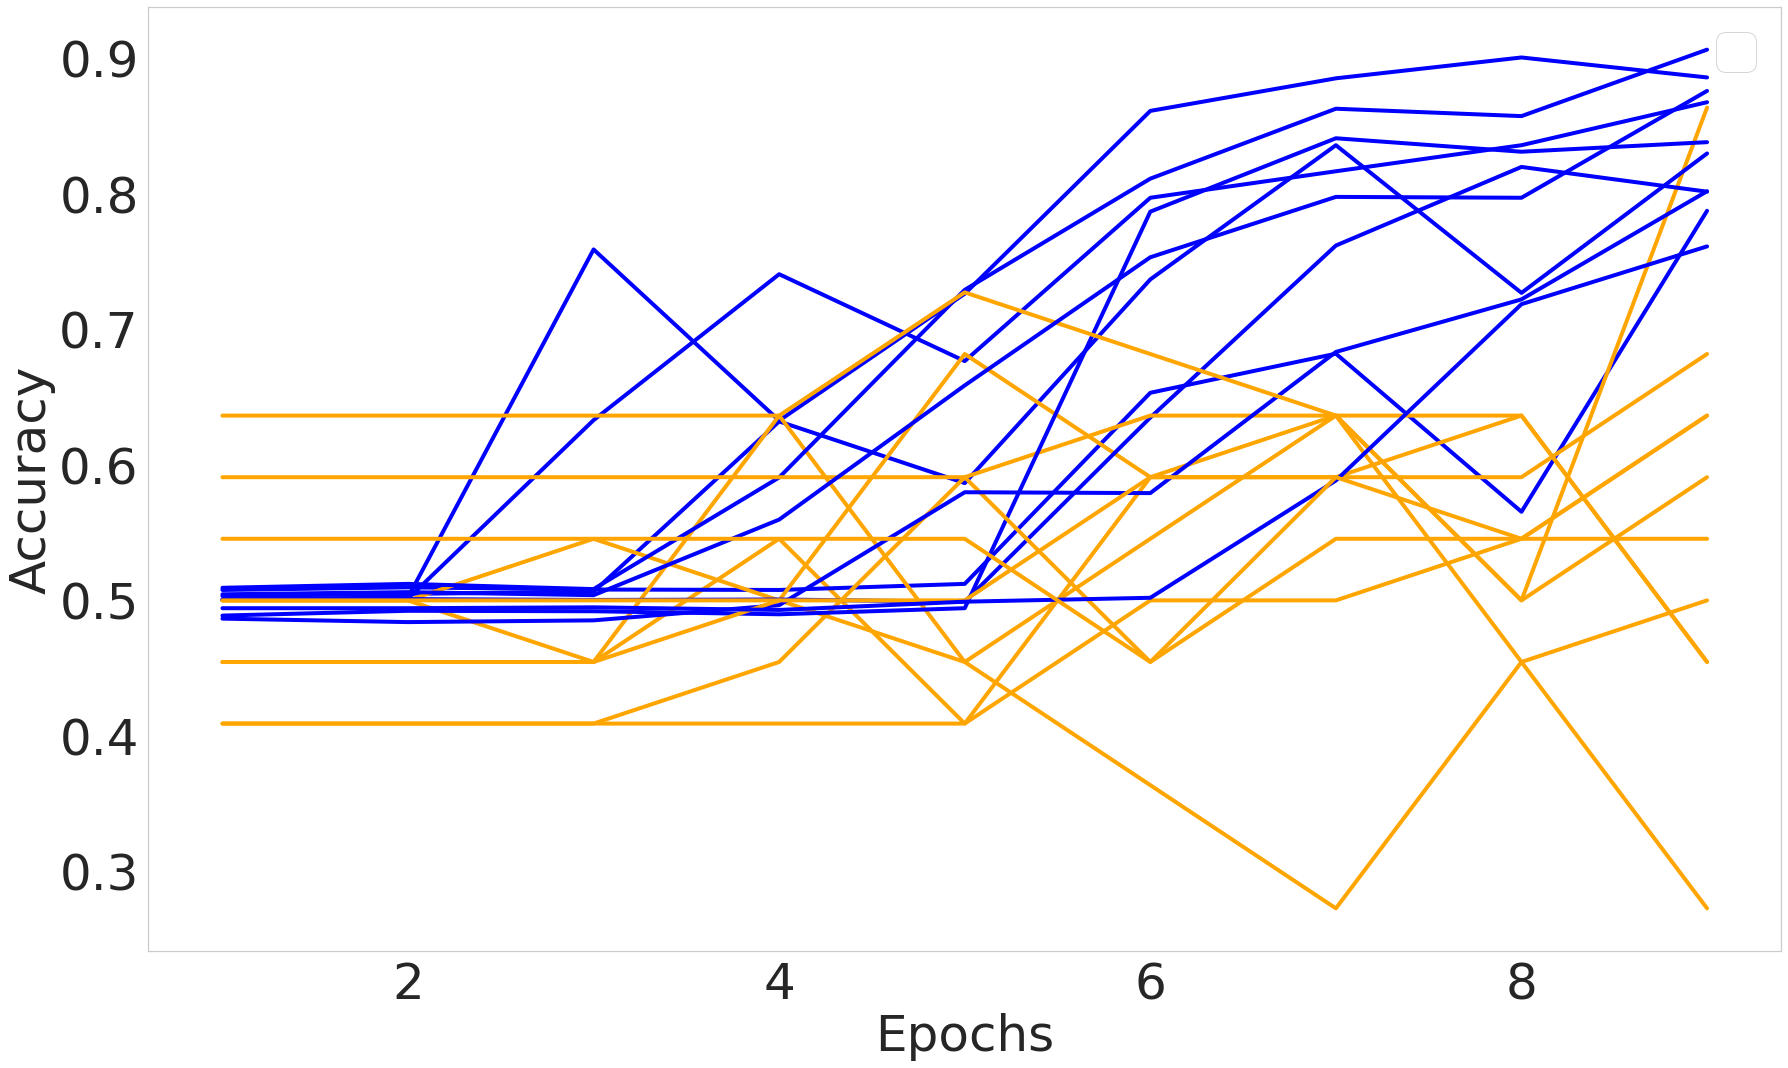

In [226]:
import matplotlib.pyplot as plt
import math
def make_plot():
    epochs = range(1, 10)
    xint = range(min(epochs)+1, math.ceil(max(epochs))+1, 2)

    colors = ["#0000FF", "#FFA500"]
    plt.figure(figsize=(25,15))
    for i in range(len(train_accuracies)):
        plt.plot(epochs, train_accuracies[i], linewidth=4, c="#0000FF")
        plt.plot(epochs, valid_accuracies[i], linewidth=4, c="#FFA500")
    plt.xlabel('Epochs', fontsize=50)
    plt.ylabel('Accuracy', fontsize=50)
    plt.legend(fontsize=50)
    plt.xticks(xint, fontsize=50)
    plt.yticks(fontsize=50)
    plt.grid()
    plt.tight_layout()
    plt.show()

make_plot()

In [260]:
"""in the original implimentation, the author start a new array as zeros,
and then add perturbations to the zeros array, to show the spectral importance.
Here, we use the same original data nad only perturb the required spectrum 
one at a time"""
from scipy import fftpack
import copy

def addDataNoise(origSignals,band=[],channels=[],srate=100, band_cut=False):
    np.random.seed(seed=404)
    signals = copy.deepcopy(origSignals)

    if (len(band)+len(channels)) == 0:
        return origSignals
    
    if (len(channels)>0) and (len(band)==0):
        for s in range(len(signals)):
            for c in channels:
                cleanSignal = origSignals[s][c,:]
                timeDomNoise = np.random.normal(np.mean(cleanSignal), 
                                                np.std(cleanSignal), 
                                                size=len(cleanSignal))
                signals[s][c,:] = np.float32(timeDomNoise)
                """add noise to all channels: cleanSignal + timeDomNoise"""

    if (len(band) == 2) and (type(band[0]) == int):
        if len(channels)==0:
            channels = range(signals[0].shape[0])
        numSamples = signals[0].shape[1]
        W = fftpack.rfftfreq(numSamples,d=1./srate)
        lowHz = next(x[0] for x in enumerate(W) if x[1] > band[0])
        highHz = next(x[0] for x in enumerate(W) if x[1] > band[1])
        for s in range(len(signals)):
            for c in channels: #loop through channels
                dataDFT = fftpack.rfft(origSignals[s][c,:])
                cleanDFT = dataDFT[lowHz:highHz]
                freqDomNoise = np.random.normal(np.mean(cleanDFT), 
                                                np.std(cleanDFT), 
                                                size=len(cleanDFT))
                dataDFT[lowHz:highHz] =  freqDomNoise#cleanDFT + freqDomNoise
                signals[s][c,:] = np.float32(fftpack.irfft(dataDFT))


    elif (len(band)>0) and (type(band) == list):
        if len(channels)==0:
            channels = range(origSignals[0].shape[0])
        
        numSamples = origSignals[0].shape[1]
        W = fftpack.rfftfreq(numSamples, d=1./srate)    
        
        for s in range(len(signals)):
            for c in channels: #loop through channels
                dataDFT_original = fftpack.rfft(origSignals[s][c,:])
                dataDFT_output = fftpack.rfft(signals[s][c,:])
                for b in band:
                    lowHz = next(x[0] for x in enumerate(W) if x[1] > b[0])
                    highHz = next(x[0] for x in enumerate(W) if x[1] > b[1])
                    cleanDFT = dataDFT_original[lowHz:highHz]
                    freqDomNoise = np.random.normal(np.mean(cleanDFT), 
                                                    np.std(cleanDFT), 
                                                    size=len(cleanDFT))
                    if band_cut:
                        dataDFT_output[lowHz:highHz] =  0 #no signal in this frequency
                    else:
                        dataDFT_output[lowHz:highHz] = freqDomNoise #freqDomNoise
                signals[s][c,:] = np.float32(fftpack.irfft(dataDFT_output))

    return signals

### Evaluation on Test Data using spectral removing (Filtering frequencey band) and perturbation

In [ ]:
def save_accuracies(models, testset_X, testset_y, band_cut=True):
    delta = [[1, 4]]
    theta = [[4, 8]]
    alpha = [[8, 12]]
    mu = [[12, 16]]
    beta = [[16, 25]]
    gamma = [[25, 40]]
    bands = [delta, theta, alpha, mu, beta, gamma]
    accuracies = {'no':[], 'delta': [], 'theta': [],
                  'alpha':[], 'mu': [], 'beta': [], 'gamma': []}
    band_names = list(accuracies.keys())[1:]
    for model in models:
        acc = evaluate(model, testset_X, testset_y, 
                       config, F.nll_loss, 
                       squeeze=True, eval=True)
        
        accuracies['no'].append(acc)
        for band, band_name in zip(bands, band_names):
            test_noisy_band = addDataNoise(testset_X, band=band, 
                                           srate=100, band_cut=band_cut)
            acc = evaluate(model, test_noisy_band, testset_y,
                           config, F.nll_loss, 
                           squeeze=True, eval=True)
            accuracies[band_name].append(acc)

    return accuracies

#filter_band_accuracies = save_accuracies(chronoNet_models, testset_X, testset_y, band_cut=True)
perturbation_band_accuracies = save_accuracies(chronoNet_models, testset_X, testset_y, band_cut=False)
clear_output()

In [204]:
import json
jsonString = json.dumps(perturbation_band_accuracies)
with open ("./results.json", "w") as jsonFile:
    jsonFile.write(jsonString)

In [232]:
def kruskal_test(acc_dict):
    accuracies = []
    bands = []
    for band, acc in acc_dict.items():
        accuracies.append(acc)
        bands.append(band)
    accuracies = np.array(accuracies)
    print(accuracies.shape)
    from scipy import stats
    for i in range(1, 7):
        print(bands[i], ":", stats.kruskal(accuracies[0, :], accuracies[i, :]))

kruskal_test(perturbation_band_accuracies)

(7, 10)
delta : KruskalResult(statistic=0.03579502637528158, pvalue=0.8499394097939134)
theta : KruskalResult(statistic=0.03576807228915561, pvalue=0.8499952484876402)
alpha : KruskalResult(statistic=0.3676492819350006, pvalue=0.5442884073432668)
mu : KruskalResult(statistic=0.17350943396226837, pvalue=0.6770115120224456)
beta : KruskalResult(statistic=0.022908816880186474, pvalue=0.8796944322343873)
gamma : KruskalResult(statistic=0.07021116138762513, pvalue=0.7910295772981856)


In [1]:
import json

with open ("./medciation_results.json", "r") as jsonFile:
    results = json.load(jsonFile)

In [2]:
import numpy as np
res = np.array(list(results.values()))
res = np.moveaxis(res, 0, 1)

In [3]:
import pandas as pd
df = pd.DataFrame(res)
df.columns = list(results.keys())
df

,no,delta,theta,alpha,mu,beta,gamma
0,0.558095,0.530476,0.517143,0.544762,0.571429,0.544762,0.558095
1,0.560000,0.545714,0.505714,0.533333,0.572381,0.560000,0.560000
2,0.477143,0.463810,0.477143,0.463810,0.463810,0.490476,0.463810
3,0.465714,0.465714,0.465714,0.465714,0.465714,0.465714,0.465714
4,0.490476,0.517143,0.490476,0.518095,0.462857,0.503810,0.490476
5,0.506667,0.480000,0.493333,0.506667,0.506667,0.493333,0.520000
6,0.504762,0.491429,0.504762,0.519048,0.519048,0.504762,0.504762
7,0.545714,0.560000,0.559048,0.586667,0.560000,0.559048,0.532381
8,0.493333,0.493333,0.493333,0.493333,0.493333,0.493333,0.493333
9,0.546667,0.520000,0.506667,0.493333,0.533333,0.533333,0.533333


In [4]:
import pandas as pd
#res = np.moveaxis(res, 0, 1)

bands = df.loc[:, df.columns != 'no']
raw = df.loc[:, df.columns == 'no']
raw = np.array(raw)

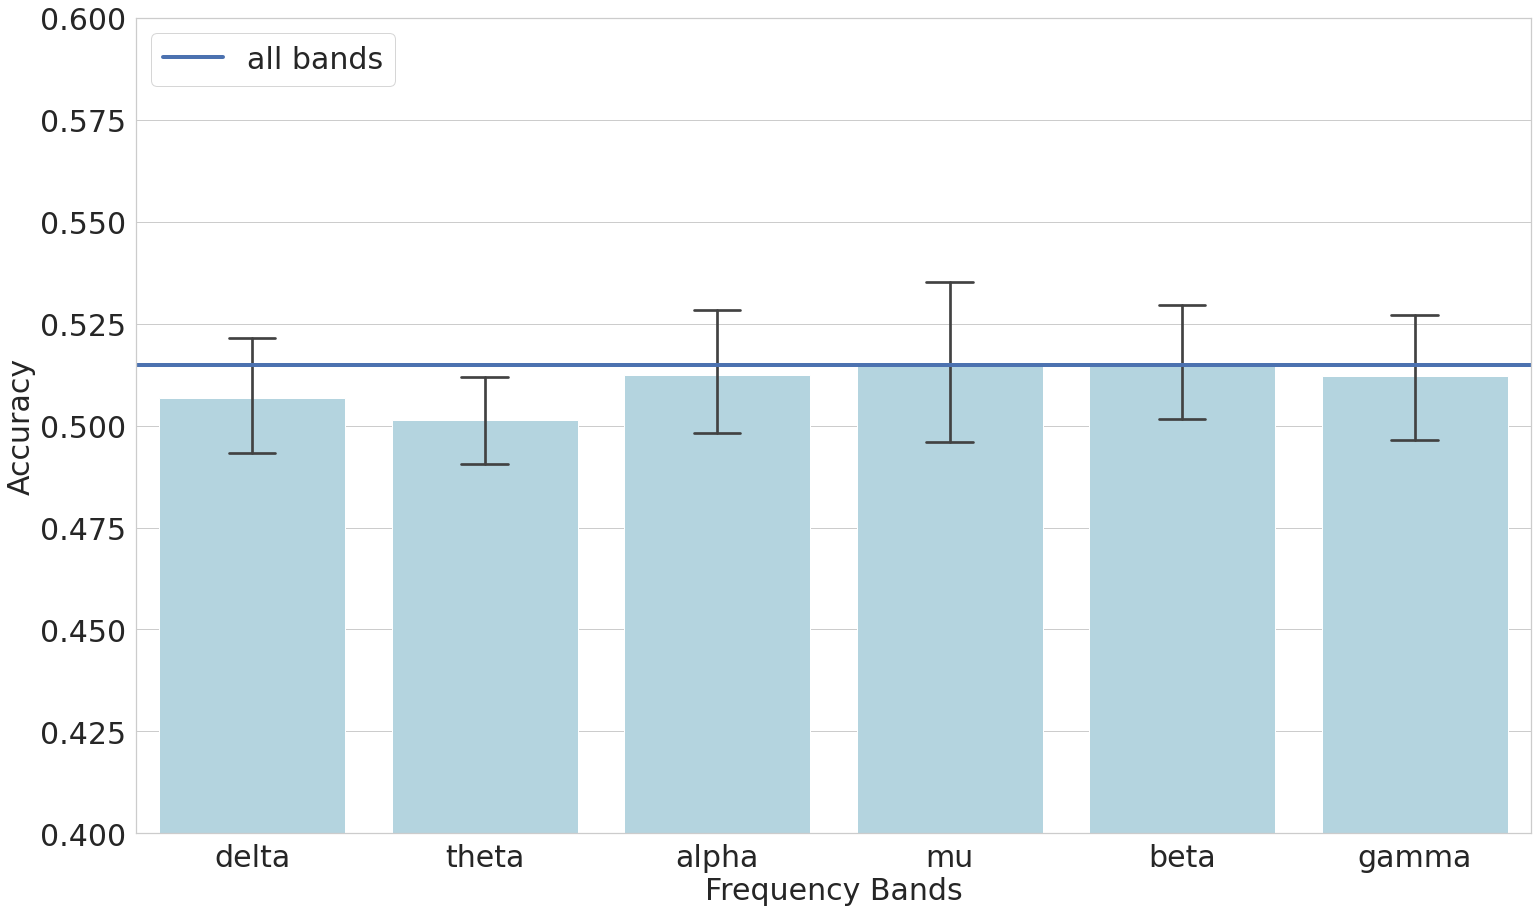

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(25,15))
sns.set_theme(style="whitegrid")
plt.ylim(0.4, 0.6)
plt.xlabel('Frequency Bands',fontsize=30)
plt.ylabel('Accuracy',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax = sns.barplot(data=bands, estimator=np.mean, ci=85, capsize=.2, color='lightblue')
ax.axhline(y=np.mean(raw), linewidth=4, label='all bands')
plt.legend(loc="upper left",  prop={'size': 30})
plt.show()